# Categorical data in linearreg vs logisticreg.png

![](Categorical_data_in_linearreg_vs_logisticreg.png)

# Sigmoid  Graph

![](Logitfunction.png)

In [114]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import numpy as np
import warnings

In [62]:
warnings.filterwarnings(action = 'ignore')

In [24]:
df = pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


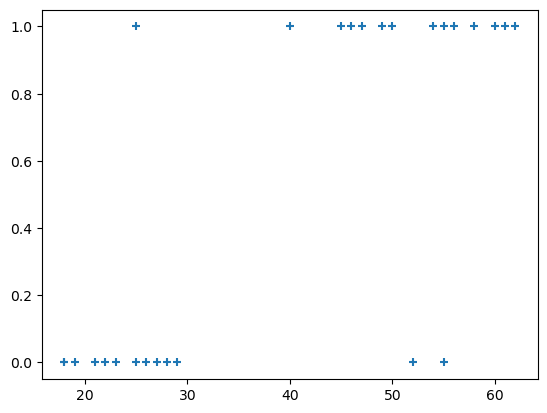

In [30]:
plt.scatter(df.age,df.bought_insurance,marker='+')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df[['bought_insurance']], test_size = 0.1, random_state = 10)

In [64]:
lr  = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_predc = lr.predict(X_test)

In [68]:
y_test

,bought_insurance
7,1
5,1
18,0


In [96]:
lr.predict([[30]])

array([0], dtype=int64)

In [98]:
lr.predict([[40]])

array([1], dtype=int64)

# Confusion Matrix

In [74]:
confu_matix = confusion_matrix(y_test,y_predc)

In [76]:
confu_matix

array([[1, 0],
       [0, 2]], dtype=int64)

# Accuracy

In [78]:
accuracy = accuracy_score(y_test,y_predc)
accuracy

1.0

# Classification Report

In [82]:
print(classification_report(y_test,y_predc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# Heat Map

<Axes: >

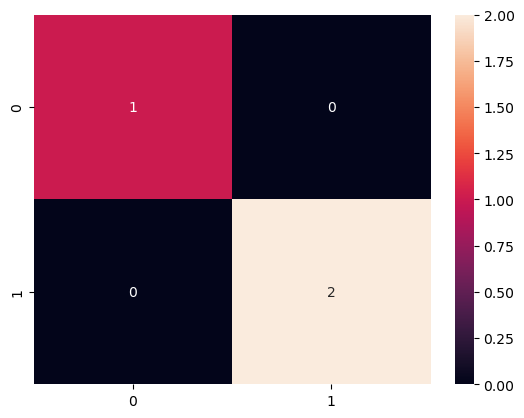

In [92]:
sns.heatmap(confu_matix,annot= True)

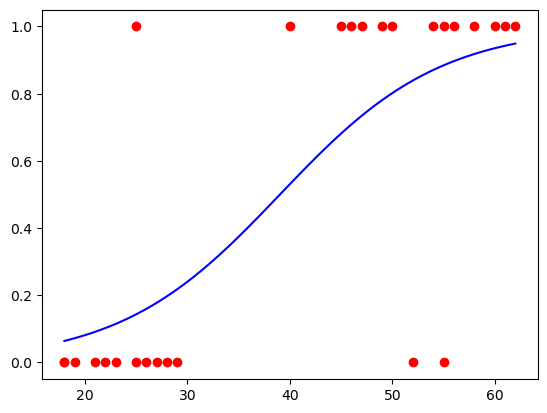

In [118]:
X_range = np.linspace(df['age'].min(), df['age'].max(), 100).reshape(-1, 1)
y_prob = lr.predict_proba(X_range)[:, 1]  # Probability of class 1

# Plot data points
plt.scatter(df['age'], df['bought_insurance'], color='red', label='Actual Data')

# Plot sigmoid curve
plt.plot(X_range, y_prob, color='blue', label='Sigmoid Curve')